Aluno: Oscar Da Silva Rodrigues Numero:15600118

## MAC05921 – Deep Learning

### DCC / IME-USP — 2024

#### **EP 2** 
Treinar um modelo do tipo U-Net utilizando o dataset DRIVE para realizar a segmentação
de imagens. Avalie o desempenho do modelo utilizando as métricas de acurácia, precision,
recall, F1-score, IoU, e outras que julgar relevantes. Discuta os resultados obtidos, desta-
cando quaisquer modificações realizadas no modelo ou na estratégia de treinamento para
lidar adequadamente com o dataset.

### **Solução:**
#### **Tentativa 1**
A solução foi elabora em cima do repositorio [**U-Net: Semantic segmentation with PyTorch**](https://github.com/milesial/Pytorch-UNet). (Customized implementation of the U-Net in PyTorch for Kaggle's Carvana Image Masking Challenge from high definition images.)\
OBS: Realizei a execução e treinamento do reposito para o problema **Carvana Image Masking Challenge** ao final do arquivo quero realizar uma comparação e ver que metricas com os dados do problema drive nele.
Não Consegui realizar ao teração dos parametros para realizar o funcionamento com o datset.

##### Erro 
INFO: Using device cuda
INFO: Network:
	3 input channels
	2 output channels (classes)
	Transposed conv upscaling
/tmp/ipykernel_82248/4225091555.py:206: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(args.load, map_location=device)

---------------------------------------------------------------------------
UnpicklingError                           Traceback (most recent call last)
Cell In[3], line 206
    200 logging.info(f'Network:\n'
    201              f'\t{model.n_channels} input channels\n'
    202              f'\t{model.n_classes} output channels (classes)\n'
    203              f'\t{"Bilinear" if model.bilinear else "Transposed conv"} upscaling')
    205 if args.load:
--> 206     state_dict = torch.load(args.load, map_location=device)
    207     del state_dict['mask_values']
    208     model.load_state_dict(state_dict)

File ~/anaconda3/lib/python3.12/site-packages/torch/serialization.py:1114, in load(f, map_location, pickle_module, weights_only, mmap, **pickle_load_args)
   1112     except RuntimeError as e:
   1113         raise pickle.UnpicklingError(_get_wo_message(str(e))) from None
-> 1114 return _legacy_load(
   1115     opened_file, map_location, pickle_module, **pickle_load_args
   1116 )

File ~/anaconda3/lib/python3.12/site-packages/torch/serialization.py:1338, in _legacy_load(f, map_location, pickle_module, **pickle_load_args)
   1332 if not hasattr(f, 'readinto') and (3, 8, 0) <= sys.version_info < (3, 8, 2):
   1333     raise RuntimeError(
   1334         "torch.load does not work with file-like objects that do not implement readinto on Python 3.8.0 and 3.8.1. "
   1335         f'Received object of type "{type(f)}". Please update to Python 3.8.2 or newer to restore this '
   1336         "functionality.")
-> 1338 magic_number = pickle_module.load(f, **pickle_load_args)
   1339 if magic_number != MAGIC_NUMBER:
   1340     raise RuntimeError("Invalid magic number; corrupt file?")

UnpicklingError: invalid load key, '{'.

Após diversas tentativas abandonei e resolvi trocar a abortagem.

#### **Tentativa 2**
A solução foi elabora em cima do repositorio [**UNet-PyTorch**](https://github.com/uygarkurt/UNet-PyTorch?tab=readme-ov-file). (Customized implementation of the U-Net in PyTorch for Kaggle's Carvana Image Masking Challenge from high definition images.)\
OBS: Realizei a execução e treinamento do reposito para o problema **Carvana Image Masking Challenge** ao final do arquivo quero realizar uma comparação e ver que metricas com os dados do problema drive nele.
Não Consegui realizar ao teração dos parametros para realizar o funcionamento com o datset.

**Problemas** \
O algoritmo emite um erro para imagens maiores que 128 X 128

<font color="red">torch.OutOfMemoryError: CUDA out of memory. Tried to allocate 512.00 MiB. GPU 0 has a total capacity of 3.81 GiB of which 21.19 MiB is free. Including non-PyTorch memory, this process has 3.78 GiB memory in use. Of the allocated memory 3.43 GiB is allocated by PyTorch, and 273.75 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)
</font>

**Modificações realizadas** \
Main
<ol>
  <li>Redimencionamento das imagens</li>
  <li>Aumento das Epoch</li>
  <li>Adcição de parte de treinamento</li>
</ol>
Datset (DriveDataset)
<ol>
  <li>Criação</li>
  <li>Inclusão da biblioteca 'albumentations' para aumentar o numero de imagens do dataset</li>
</ol> 
<font color="red">Não consegui tambem fazer o modelo convergir
</font>

**Resultados Obtidos** <br>
![Minha Imagem](imagens/epochas.png)

### **Resultado**
Não obtive um bom resultado
mexi algumas vez a função de validação e nas epocas.
#### **Tentativa 2**
A solução foi elabora em cima do repositorio [**drive-vessels-unet**](https://github.com/DIAGNijmegen/drive-vessels-unet). (CThis repository will detail how you can train and deploy a U-Net for retinal vessel segmentation on the DRIVE dataset using Docker.

💡 To use the pre-trained model and wrap it in a Docker container, follow the instructions provided in the documentation for grand-challenge.org..)\
**Solução** \
a ordem de inserção dos dados para teste estava misturada demorei bastate tempo para descobrir. Mesmo assim não consegui pazer os dados convergirem.

**Notebook** esta na pasta drive-vessels-unet/EP02.ipynb

**Resultados Obtidos** <br>
![Eopocha](imagens/epochasFinal.png)


**Saidas do treinamento**
----------
epoch 1/100
1/4, train_loss: 0.7228
2/4, train_loss: 0.7192
3/4, train_loss: 0.7170
4/4, train_loss: 0.7153
epoch 1 average loss: 0.7186
Epoch 1 - Dice Score: 0.0001, Precision: -0.0001, Recall: 0.0131, F1-Score: -0.0002, IoU: 0.0002
saved new best metric model
current epoch: 1 current val loss: 0.7130 best val loss: 0.7130 at epoch 1
----------
epoch 2/100
1/4, train_loss: 0.7136
2/4, train_loss: 0.7105
3/4, train_loss: 0.7084
4/4, train_loss: 0.7068
epoch 2 average loss: 0.7098
Epoch 2 - Dice Score: -0.0003, Precision: -0.0003, Recall: 0.0411, F1-Score: -0.0005, IoU: 0.0000
saved new best metric model
current epoch: 2 current val loss: 0.7059 best val loss: 0.7059 at epoch 2
----------
epoch 3/100
1/4, train_loss: 0.7053
2/4, train_loss: 0.7039
3/4, train_loss: 0.7023
4/4, train_loss: 0.7001
epoch 3 average loss: 0.7029
Epoch 3 - Dice Score: -0.0003, Precision: -0.0003, Recall: 0.0514, F1-Score: -0.0006, IoU: -0.0000
saved new best metric model
current epoch: 3 current val loss: 0.6996 best val loss: 0.6996 at epoch 3
----------
epoch 4/100
1/4, train_loss: 0.6986
2/4, train_loss: 0.6982
3/4, train_loss: 0.6960
4/4, train_loss: 0.6943
epoch 4 average loss: 0.6968
Epoch 4 - Dice Score: 0.0001, Precision: -0.0001, Recall: 0.0174, F1-Score: -0.0002, IoU: 0.0001
saved new best metric model
current epoch: 4 current val loss: 0.6938 best val loss: 0.6938 at epoch 4
----------
epoch 5/100
1/4, train_loss: 0.6931
2/4, train_loss: 0.6913
3/4, train_loss: 0.6905
4/4, train_loss: 0.6901
epoch 5 average loss: 0.6913
Epoch 5 - Dice Score: 0.0001, Precision: -0.0001, Recall: 0.0132, F1-Score: -0.0001, IoU: 0.0002
saved new best metric model
current epoch: 5 current val loss: 0.6885 best val loss: 0.6885 at epoch 5
----------
epoch 6/100
1/4, train_loss: 0.6876
2/4, train_loss: 0.6867
3/4, train_loss: 0.6852
4/4, train_loss: 0.6852
epoch 6 average loss: 0.6862
Epoch 6 - Dice Score: -0.0000, Precision: -0.0001, Recall: 0.0240, F1-Score: -0.0002, IoU: 0.0001
saved new best metric model
current epoch: 6 current val loss: 0.6837 best val loss: 0.6837 at epoch 6
----------
epoch 7/100
1/4, train_loss: 0.6833
2/4, train_loss: 0.6817
3/4, train_loss: 0.6806
4/4, train_loss: 0.6807
epoch 7 average loss: 0.6816
Epoch 7 - Dice Score: -0.0000, Precision: -0.0001, Recall: 0.0256, F1-Score: -0.0002, IoU: 0.0001
saved new best metric model
current epoch: 7 current val loss: 0.6794 best val loss: 0.6794 at epoch 7
----------
epoch 8/100
1/4, train_loss: 0.6787
2/4, train_loss: 0.6789
3/4, train_loss: 0.6765
4/4, train_loss: 0.6762
epoch 8 average loss: 0.6776
Epoch 8 - Dice Score: 0.0001, Precision: -0.0000, Recall: 0.0091, F1-Score: -0.0001, IoU: 0.0002
saved new best metric model
current epoch: 8 current val loss: 0.6757 best val loss: 0.6757 at epoch 8
----------
epoch 9/100
1/4, train_loss: 0.6747
2/4, train_loss: 0.6752
3/4, train_loss: 0.6736
4/4, train_loss: 0.6727
epoch 9 average loss: 0.6740
Epoch 9 - Dice Score: 0.0001, Precision: -0.0001, Recall: 0.0156, F1-Score: -0.0001, IoU: 0.0001
saved new best metric model
current epoch: 9 current val loss: 0.6724 best val loss: 0.6724 at epoch 9
----------
epoch 10/100
1/4, train_loss: 0.6716
2/4, train_loss: 0.6712
3/4, train_loss: 0.6713
4/4, train_loss: 0.6697
epoch 10 average loss: 0.6710
Epoch 10 - Dice Score: 0.0002, Precision: -0.0000, Recall: 0.0005, F1-Score: -0.0000, IoU: 0.0002
saved new best metric model
current epoch: 10 current val loss: 0.6696 best val loss: 0.6696 at epoch 10
----------
epoch 11/100
1/4, train_loss: 0.6698
2/4, train_loss: 0.6684
3/4, train_loss: 0.6678
4/4, train_loss: 0.6671
epoch 11 average loss: 0.6683
Epoch 11 - Dice Score: 0.0003, Precision: 0.0001, Recall: -0.0169, F1-Score: 0.0001, IoU: 0.0002
saved new best metric model
current epoch: 11 current val loss: 0.6671 best val loss: 0.6671 at epoch 11
----------
epoch 12/100
1/4, train_loss: 0.6671
2/4, train_loss: 0.6660
3/4, train_loss: 0.6654
4/4, train_loss: 0.6651
epoch 12 average loss: 0.6659
Epoch 12 - Dice Score: 0.0002, Precision: -0.0000, Recall: 0.0021, F1-Score: -0.0000, IoU: 0.0002
saved new best metric model
current epoch: 12 current val loss: 0.6649 best val loss: 0.6649 at epoch 12
----------
epoch 13/100
1/4, train_loss: 0.6645
2/4, train_loss: 0.6636
3/4, train_loss: 0.6635
4/4, train_loss: 0.6636
epoch 13 average loss: 0.6638
Epoch 13 - Dice Score: 0.0003, Precision: 0.0001, Recall: -0.0257, F1-Score: 0.0002, IoU: 0.0003
saved new best metric model
current epoch: 13 current val loss: 0.6629 best val loss: 0.6629 at epoch 13
----------
epoch 14/100
1/4, train_loss: 0.6625
2/4, train_loss: 0.6619
3/4, train_loss: 0.6622
4/4, train_loss: 0.6610
epoch 14 average loss: 0.6619
Epoch 14 - Dice Score: 0.0003, Precision: 0.0001, Recall: -0.0183, F1-Score: 0.0001, IoU: 0.0002
saved new best metric model
current epoch: 14 current val loss: 0.6611 best val loss: 0.6611 at epoch 14
----------
epoch 15/100
1/4, train_loss: 0.6606
2/4, train_loss: 0.6601
3/4, train_loss: 0.6606
4/4, train_loss: 0.6596
epoch 15 average loss: 0.6602
Epoch 15 - Dice Score: 0.0003, Precision: 0.0001, Recall: -0.0224, F1-Score: 0.0001, IoU: 0.0002
saved new best metric model
current epoch: 15 current val loss: 0.6595 best val loss: 0.6595 at epoch 15
----------
epoch 16/100
1/4, train_loss: 0.6591
2/4, train_loss: 0.6588
3/4, train_loss: 0.6589
4/4, train_loss: 0.6579
epoch 16 average loss: 0.6587
Epoch 16 - Dice Score: 0.0003, Precision: 0.0001, Recall: -0.0152, F1-Score: 0.0001, IoU: 0.0002
saved new best metric model
current epoch: 16 current val loss: 0.6581 best val loss: 0.6581 at epoch 16
----------
epoch 17/100
1/4, train_loss: 0.6576
2/4, train_loss: 0.6571
3/4, train_loss: 0.6569
4/4, train_loss: 0.6575
epoch 17 average loss: 0.6573
Epoch 17 - Dice Score: 0.0004, Precision: 0.0001, Recall: -0.0301, F1-Score: 0.0002, IoU: 0.0003
saved new best metric model
current epoch: 17 current val loss: 0.6567 best val loss: 0.6567 at epoch 17
----------
epoch 18/100
1/4, train_loss: 0.6562
2/4, train_loss: 0.6565
3/4, train_loss: 0.6556
4/4, train_loss: 0.6555
epoch 18 average loss: 0.6559
Epoch 18 - Dice Score: 0.0003, Precision: 0.0001, Recall: -0.0225, F1-Score: 0.0001, IoU: 0.0002
saved new best metric model
current epoch: 18 current val loss: 0.6555 best val loss: 0.6555 at epoch 18
----------
epoch 19/100
1/4, train_loss: 0.6549
2/4, train_loss: 0.6547
3/4, train_loss: 0.6550
4/4, train_loss: 0.6544
epoch 19 average loss: 0.6547
Epoch 19 - Dice Score: 0.0004, Precision: 0.0001, Recall: -0.0376, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 19 current val loss: 0.6543 best val loss: 0.6543 at epoch 19
----------
epoch 20/100
1/4, train_loss: 0.6538
2/4, train_loss: 0.6542
3/4, train_loss: 0.6530
4/4, train_loss: 0.6532
epoch 20 average loss: 0.6536
Epoch 20 - Dice Score: 0.0004, Precision: 0.0001, Recall: -0.0406, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 20 current val loss: 0.6531 best val loss: 0.6531 at epoch 20
----------
epoch 21/100
1/4, train_loss: 0.6528
2/4, train_loss: 0.6528
3/4, train_loss: 0.6522
4/4, train_loss: 0.6519
epoch 21 average loss: 0.6524
Epoch 21 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0524, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 21 current val loss: 0.6520 best val loss: 0.6520 at epoch 21
----------
epoch 22/100
1/4, train_loss: 0.6517
2/4, train_loss: 0.6514
3/4, train_loss: 0.6509
4/4, train_loss: 0.6514
epoch 22 average loss: 0.6514
Epoch 22 - Dice Score: 0.0004, Precision: 0.0002, Recall: -0.0463, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 22 current val loss: 0.6510 best val loss: 0.6510 at epoch 22
----------
epoch 23/100
1/4, train_loss: 0.6503
2/4, train_loss: 0.6509
3/4, train_loss: 0.6501
4/4, train_loss: 0.6500
epoch 23 average loss: 0.6503
Epoch 23 - Dice Score: 0.0004, Precision: 0.0002, Recall: -0.0491, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 23 current val loss: 0.6500 best val loss: 0.6500 at epoch 23
----------
epoch 24/100
1/4, train_loss: 0.6501
2/4, train_loss: 0.6493
3/4, train_loss: 0.6492
4/4, train_loss: 0.6489
epoch 24 average loss: 0.6494
Epoch 24 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0596, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 24 current val loss: 0.6490 best val loss: 0.6490 at epoch 24
----------
epoch 25/100
1/4, train_loss: 0.6487
2/4, train_loss: 0.6483
3/4, train_loss: 0.6485
4/4, train_loss: 0.6480
epoch 25 average loss: 0.6484
Epoch 25 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0618, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 25 current val loss: 0.6481 best val loss: 0.6481 at epoch 25
----------
epoch 26/100
1/4, train_loss: 0.6478
2/4, train_loss: 0.6478
3/4, train_loss: 0.6474
4/4, train_loss: 0.6468
epoch 26 average loss: 0.6475
Epoch 26 - Dice Score: 0.0004, Precision: 0.0001, Recall: -0.0454, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 26 current val loss: 0.6472 best val loss: 0.6472 at epoch 26
----------
epoch 27/100
1/4, train_loss: 0.6470
2/4, train_loss: 0.6463
3/4, train_loss: 0.6466
4/4, train_loss: 0.6464
epoch 27 average loss: 0.6466
Epoch 27 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0584, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 27 current val loss: 0.6463 best val loss: 0.6463 at epoch 27
----------
epoch 28/100
1/4, train_loss: 0.6460
2/4, train_loss: 0.6458
3/4, train_loss: 0.6455
4/4, train_loss: 0.6454
epoch 28 average loss: 0.6457
Epoch 28 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0607, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 28 current val loss: 0.6454 best val loss: 0.6454 at epoch 28
----------
epoch 29/100
1/4, train_loss: 0.6449
2/4, train_loss: 0.6448
3/4, train_loss: 0.6443
4/4, train_loss: 0.6450
epoch 29 average loss: 0.6448
Epoch 29 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0698, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 29 current val loss: 0.6445 best val loss: 0.6445 at epoch 29
----------
epoch 30/100
1/4, train_loss: 0.6442
2/4, train_loss: 0.6445
3/4, train_loss: 0.6433
4/4, train_loss: 0.6435
epoch 30 average loss: 0.6439
Epoch 30 - Dice Score: 0.0004, Precision: 0.0001, Recall: -0.0610, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 30 current val loss: 0.6435 best val loss: 0.6435 at epoch 30
----------
epoch 31/100
1/4, train_loss: 0.6431
2/4, train_loss: 0.6435
3/4, train_loss: 0.6427
4/4, train_loss: 0.6424
epoch 31 average loss: 0.6429
Epoch 31 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0732, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 31 current val loss: 0.6426 best val loss: 0.6426 at epoch 31
----------
epoch 32/100
1/4, train_loss: 0.6423
2/4, train_loss: 0.6425
3/4, train_loss: 0.6412
4/4, train_loss: 0.6417
epoch 32 average loss: 0.6419
Epoch 32 - Dice Score: 0.0004, Precision: 0.0002, Recall: -0.0648, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 32 current val loss: 0.6416 best val loss: 0.6416 at epoch 32
----------
epoch 33/100
1/4, train_loss: 0.6416
2/4, train_loss: 0.6410
3/4, train_loss: 0.6408
4/4, train_loss: 0.6402
epoch 33 average loss: 0.6409
Epoch 33 - Dice Score: 0.0004, Precision: 0.0002, Recall: -0.0669, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 33 current val loss: 0.6405 best val loss: 0.6405 at epoch 33
----------
epoch 34/100
1/4, train_loss: 0.6400
2/4, train_loss: 0.6397
3/4, train_loss: 0.6398
4/4, train_loss: 0.6399
epoch 34 average loss: 0.6398
Epoch 34 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0744, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 34 current val loss: 0.6395 best val loss: 0.6395 at epoch 34
----------
epoch 35/100
1/4, train_loss: 0.6391
2/4, train_loss: 0.6388
3/4, train_loss: 0.6385
4/4, train_loss: 0.6387
epoch 35 average loss: 0.6388
Epoch 35 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0803, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 35 current val loss: 0.6385 best val loss: 0.6385 at epoch 35
----------
epoch 36/100
1/4, train_loss: 0.6379
2/4, train_loss: 0.6380
3/4, train_loss: 0.6377
4/4, train_loss: 0.6376
epoch 36 average loss: 0.6378
Epoch 36 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0734, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 36 current val loss: 0.6375 best val loss: 0.6375 at epoch 36
----------
epoch 37/100
1/4, train_loss: 0.6375
2/4, train_loss: 0.6368
3/4, train_loss: 0.6367
4/4, train_loss: 0.6363
epoch 37 average loss: 0.6368
Epoch 37 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.0802, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 37 current val loss: 0.6366 best val loss: 0.6366 at epoch 37
----------
epoch 38/100
1/4, train_loss: 0.6363
2/4, train_loss: 0.6357
3/4, train_loss: 0.6362
4/4, train_loss: 0.6354
epoch 38 average loss: 0.6359
Epoch 38 - Dice Score: 0.0004, Precision: 0.0002, Recall: -0.0758, F1-Score: 0.0003, IoU: 0.0003
saved new best metric model
current epoch: 38 current val loss: 0.6357 best val loss: 0.6357 at epoch 38
----------
epoch 39/100
1/4, train_loss: 0.6353
2/4, train_loss: 0.6349
3/4, train_loss: 0.6352
4/4, train_loss: 0.6346
epoch 39 average loss: 0.6350
Epoch 39 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0860, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 39 current val loss: 0.6348 best val loss: 0.6348 at epoch 39
----------
epoch 40/100
1/4, train_loss: 0.6345
2/4, train_loss: 0.6341
3/4, train_loss: 0.6338
4/4, train_loss: 0.6340
epoch 40 average loss: 0.6341
Epoch 40 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.0853, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 40 current val loss: 0.6340 best val loss: 0.6340 at epoch 40
----------
epoch 41/100
1/4, train_loss: 0.6333
2/4, train_loss: 0.6337
3/4, train_loss: 0.6331
4/4, train_loss: 0.6330
epoch 41 average loss: 0.6333
Epoch 41 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0784, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 41 current val loss: 0.6331 best val loss: 0.6331 at epoch 41
----------
epoch 42/100
1/4, train_loss: 0.6332
2/4, train_loss: 0.6324
3/4, train_loss: 0.6321
4/4, train_loss: 0.6320
epoch 42 average loss: 0.6324
Epoch 42 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0824, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 42 current val loss: 0.6323 best val loss: 0.6323 at epoch 42
----------
epoch 43/100
1/4, train_loss: 0.6322
2/4, train_loss: 0.6314
3/4, train_loss: 0.6315
4/4, train_loss: 0.6314
epoch 43 average loss: 0.6316
Epoch 43 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0903, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 43 current val loss: 0.6315 best val loss: 0.6315 at epoch 43
----------
epoch 44/100
1/4, train_loss: 0.6313
2/4, train_loss: 0.6309
3/4, train_loss: 0.6306
4/4, train_loss: 0.6304
epoch 44 average loss: 0.6308
Epoch 44 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0912, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 44 current val loss: 0.6307 best val loss: 0.6307 at epoch 44
----------
epoch 45/100
1/4, train_loss: 0.6307
2/4, train_loss: 0.6302
3/4, train_loss: 0.6296
4/4, train_loss: 0.6297
epoch 45 average loss: 0.6300
Epoch 45 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0906, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 45 current val loss: 0.6300 best val loss: 0.6300 at epoch 45
----------
epoch 46/100
1/4, train_loss: 0.6296
2/4, train_loss: 0.6293
3/4, train_loss: 0.6294
4/4, train_loss: 0.6290
epoch 46 average loss: 0.6293
Epoch 46 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0855, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 46 current val loss: 0.6293 best val loss: 0.6293 at epoch 46
----------
epoch 47/100
1/4, train_loss: 0.6289
2/4, train_loss: 0.6284
3/4, train_loss: 0.6286
4/4, train_loss: 0.6288
epoch 47 average loss: 0.6287
Epoch 47 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0869, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 47 current val loss: 0.6286 best val loss: 0.6286 at epoch 47
----------
epoch 48/100
1/4, train_loss: 0.6285
2/4, train_loss: 0.6282
3/4, train_loss: 0.6278
4/4, train_loss: 0.6277
epoch 48 average loss: 0.6280
Epoch 48 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0873, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 48 current val loss: 0.6280 best val loss: 0.6280 at epoch 48
----------
epoch 49/100
1/4, train_loss: 0.6277
2/4, train_loss: 0.6276
3/4, train_loss: 0.6273
4/4, train_loss: 0.6274
epoch 49 average loss: 0.6275
Epoch 49 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0901, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 49 current val loss: 0.6275 best val loss: 0.6275 at epoch 49
----------
epoch 50/100
1/4, train_loss: 0.6270
2/4, train_loss: 0.6270
3/4, train_loss: 0.6272
4/4, train_loss: 0.6266
epoch 50 average loss: 0.6270
Epoch 50 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0962, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 50 current val loss: 0.6270 best val loss: 0.6270 at epoch 50
----------
epoch 51/100
1/4, train_loss: 0.6267
2/4, train_loss: 0.6266
3/4, train_loss: 0.6263
4/4, train_loss: 0.6263
epoch 51 average loss: 0.6265
Epoch 51 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0969, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 51 current val loss: 0.6265 best val loss: 0.6265 at epoch 51
----------
epoch 52/100
1/4, train_loss: 0.6263
2/4, train_loss: 0.6260
3/4, train_loss: 0.6260
4/4, train_loss: 0.6258
epoch 52 average loss: 0.6260
Epoch 52 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.0991, F1-Score: 0.0005, IoU: 0.0003
saved new best metric model
current epoch: 52 current val loss: 0.6261 best val loss: 0.6261 at epoch 52
----------
epoch 53/100
1/4, train_loss: 0.6257
2/4, train_loss: 0.6256
3/4, train_loss: 0.6253
4/4, train_loss: 0.6257
epoch 53 average loss: 0.6256
Epoch 53 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.1000, F1-Score: 0.0005, IoU: 0.0003
saved new best metric model
current epoch: 53 current val loss: 0.6257 best val loss: 0.6257 at epoch 53
----------
epoch 54/100
1/4, train_loss: 0.6255
2/4, train_loss: 0.6252
3/4, train_loss: 0.6253
4/4, train_loss: 0.6248
epoch 54 average loss: 0.6252
Epoch 54 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0933, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 54 current val loss: 0.6253 best val loss: 0.6253 at epoch 54
----------
epoch 55/100
1/4, train_loss: 0.6250
2/4, train_loss: 0.6248
3/4, train_loss: 0.6248
4/4, train_loss: 0.6247
epoch 55 average loss: 0.6248
Epoch 55 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0920, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 55 current val loss: 0.6249 best val loss: 0.6249 at epoch 55
----------
epoch 56/100
1/4, train_loss: 0.6245
2/4, train_loss: 0.6245
3/4, train_loss: 0.6245
4/4, train_loss: 0.6243
epoch 56 average loss: 0.6244
Epoch 56 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.1019, F1-Score: 0.0005, IoU: 0.0003
saved new best metric model
current epoch: 56 current val loss: 0.6245 best val loss: 0.6245 at epoch 56
----------
epoch 57/100
1/4, train_loss: 0.6243
2/4, train_loss: 0.6241
3/4, train_loss: 0.6240
4/4, train_loss: 0.6239
epoch 57 average loss: 0.6241
Epoch 57 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1002, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 57 current val loss: 0.6242 best val loss: 0.6242 at epoch 57
----------
epoch 58/100
1/4, train_loss: 0.6236
2/4, train_loss: 0.6237
3/4, train_loss: 0.6239
4/4, train_loss: 0.6237
epoch 58 average loss: 0.6238
Epoch 58 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0936, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 58 current val loss: 0.6239 best val loss: 0.6239 at epoch 58
----------
epoch 59/100
1/4, train_loss: 0.6235
2/4, train_loss: 0.6236
3/4, train_loss: 0.6234
4/4, train_loss: 0.6233
epoch 59 average loss: 0.6234
Epoch 59 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0964, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 59 current val loss: 0.6235 best val loss: 0.6235 at epoch 59
----------
epoch 60/100
1/4, train_loss: 0.6233
2/4, train_loss: 0.6230
3/4, train_loss: 0.6231
4/4, train_loss: 0.6231
epoch 60 average loss: 0.6231
Epoch 60 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0945, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 60 current val loss: 0.6232 best val loss: 0.6232 at epoch 60
----------
epoch 61/100
1/4, train_loss: 0.6229
2/4, train_loss: 0.6229
3/4, train_loss: 0.6229
4/4, train_loss: 0.6226
epoch 61 average loss: 0.6228
Epoch 61 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0978, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 61 current val loss: 0.6229 best val loss: 0.6229 at epoch 61
----------
epoch 62/100
1/4, train_loss: 0.6228
2/4, train_loss: 0.6227
3/4, train_loss: 0.6223
4/4, train_loss: 0.6224
epoch 62 average loss: 0.6225
Epoch 62 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0976, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 62 current val loss: 0.6227 best val loss: 0.6227 at epoch 62
----------
epoch 63/100
1/4, train_loss: 0.6222
2/4, train_loss: 0.6224
3/4, train_loss: 0.6222
4/4, train_loss: 0.6221
epoch 63 average loss: 0.6222
Epoch 63 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0957, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 63 current val loss: 0.6224 best val loss: 0.6224 at epoch 63
----------
epoch 64/100
1/4, train_loss: 0.6220
2/4, train_loss: 0.6221
3/4, train_loss: 0.6220
4/4, train_loss: 0.6218
epoch 64 average loss: 0.6220
Epoch 64 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0983, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 64 current val loss: 0.6221 best val loss: 0.6221 at epoch 64
----------
epoch 65/100
1/4, train_loss: 0.6218
2/4, train_loss: 0.6217
3/4, train_loss: 0.6216
4/4, train_loss: 0.6217
epoch 65 average loss: 0.6217
Epoch 65 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0986, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 65 current val loss: 0.6219 best val loss: 0.6219 at epoch 65
----------
epoch 66/100
1/4, train_loss: 0.6216
2/4, train_loss: 0.6214
3/4, train_loss: 0.6214
4/4, train_loss: 0.6214
epoch 66 average loss: 0.6215
Epoch 66 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0967, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 66 current val loss: 0.6216 best val loss: 0.6216 at epoch 66
----------
epoch 67/100
1/4, train_loss: 0.6213
2/4, train_loss: 0.6213
3/4, train_loss: 0.6212
4/4, train_loss: 0.6210
epoch 67 average loss: 0.6212
Epoch 67 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1000, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 67 current val loss: 0.6213 best val loss: 0.6213 at epoch 67
----------
epoch 68/100
1/4, train_loss: 0.6211
2/4, train_loss: 0.6209
3/4, train_loss: 0.6210
4/4, train_loss: 0.6209
epoch 68 average loss: 0.6210
Epoch 68 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1004, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 68 current val loss: 0.6211 best val loss: 0.6211 at epoch 68
----------
epoch 69/100
1/4, train_loss: 0.6209
2/4, train_loss: 0.6208
3/4, train_loss: 0.6206
4/4, train_loss: 0.6206
epoch 69 average loss: 0.6207
Epoch 69 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0997, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 69 current val loss: 0.6209 best val loss: 0.6209 at epoch 69
----------
epoch 70/100
1/4, train_loss: 0.6205
2/4, train_loss: 0.6204
3/4, train_loss: 0.6207
4/4, train_loss: 0.6204
epoch 70 average loss: 0.6205
Epoch 70 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1010, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 70 current val loss: 0.6206 best val loss: 0.6206 at epoch 70
----------
epoch 71/100
1/4, train_loss: 0.6204
2/4, train_loss: 0.6204
3/4, train_loss: 0.6201
4/4, train_loss: 0.6202
epoch 71 average loss: 0.6203
Epoch 71 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1043, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 71 current val loss: 0.6204 best val loss: 0.6204 at epoch 71
----------
epoch 72/100
1/4, train_loss: 0.6200
2/4, train_loss: 0.6201
3/4, train_loss: 0.6200
4/4, train_loss: 0.6201
epoch 72 average loss: 0.6201
Epoch 72 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1046, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 72 current val loss: 0.6202 best val loss: 0.6202 at epoch 72
----------
epoch 73/100
1/4, train_loss: 0.6201
2/4, train_loss: 0.6199
3/4, train_loss: 0.6198
4/4, train_loss: 0.6197
epoch 73 average loss: 0.6199
Epoch 73 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1008, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 73 current val loss: 0.6200 best val loss: 0.6200 at epoch 73
----------
epoch 74/100
1/4, train_loss: 0.6197
2/4, train_loss: 0.6198
3/4, train_loss: 0.6195
4/4, train_loss: 0.6197
epoch 74 average loss: 0.6197
Epoch 74 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.1085, F1-Score: 0.0005, IoU: 0.0003
saved new best metric model
current epoch: 74 current val loss: 0.6198 best val loss: 0.6198 at epoch 74
----------
epoch 75/100
1/4, train_loss: 0.6196
2/4, train_loss: 0.6195
3/4, train_loss: 0.6194
4/4, train_loss: 0.6195
epoch 75 average loss: 0.6195
Epoch 75 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.0994, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 75 current val loss: 0.6196 best val loss: 0.6196 at epoch 75
----------
epoch 76/100
1/4, train_loss: 0.6193
2/4, train_loss: 0.6193
3/4, train_loss: 0.6194
4/4, train_loss: 0.6192
epoch 76 average loss: 0.6193
Epoch 76 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1016, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 76 current val loss: 0.6194 best val loss: 0.6194 at epoch 76
----------
epoch 77/100
1/4, train_loss: 0.6190
2/4, train_loss: 0.6193
3/4, train_loss: 0.6191
4/4, train_loss: 0.6190
epoch 77 average loss: 0.6191
Epoch 77 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1059, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 77 current val loss: 0.6193 best val loss: 0.6193 at epoch 77
----------
epoch 78/100
1/4, train_loss: 0.6190
2/4, train_loss: 0.6188
3/4, train_loss: 0.6190
4/4, train_loss: 0.6190
epoch 78 average loss: 0.6189
Epoch 78 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.1074, F1-Score: 0.0005, IoU: 0.0003
saved new best metric model
current epoch: 78 current val loss: 0.6191 best val loss: 0.6191 at epoch 78
----------
epoch 79/100
1/4, train_loss: 0.6189
2/4, train_loss: 0.6187
3/4, train_loss: 0.6187
4/4, train_loss: 0.6187
epoch 79 average loss: 0.6188
Epoch 79 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.1076, F1-Score: 0.0005, IoU: 0.0003
saved new best metric model
current epoch: 79 current val loss: 0.6189 best val loss: 0.6189 at epoch 79
----------
epoch 80/100
1/4, train_loss: 0.6187
2/4, train_loss: 0.6188
3/4, train_loss: 0.6185
4/4, train_loss: 0.6185
epoch 80 average loss: 0.6186
Epoch 80 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1005, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 80 current val loss: 0.6187 best val loss: 0.6187 at epoch 80
----------
epoch 81/100
1/4, train_loss: 0.6184
2/4, train_loss: 0.6185
3/4, train_loss: 0.6184
4/4, train_loss: 0.6185
epoch 81 average loss: 0.6184
Epoch 81 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1068, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 81 current val loss: 0.6185 best val loss: 0.6185 at epoch 81
----------
epoch 82/100
1/4, train_loss: 0.6183
2/4, train_loss: 0.6184
3/4, train_loss: 0.6182
4/4, train_loss: 0.6181
epoch 82 average loss: 0.6183
Epoch 82 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1033, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 82 current val loss: 0.6184 best val loss: 0.6184 at epoch 82
----------
epoch 83/100
1/4, train_loss: 0.6182
2/4, train_loss: 0.6180
3/4, train_loss: 0.6182
4/4, train_loss: 0.6180
epoch 83 average loss: 0.6181
Epoch 83 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1013, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 83 current val loss: 0.6182 best val loss: 0.6182 at epoch 83
----------
epoch 84/100
1/4, train_loss: 0.6179
2/4, train_loss: 0.6179
3/4, train_loss: 0.6180
4/4, train_loss: 0.6179
epoch 84 average loss: 0.6179
Epoch 84 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1051, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 84 current val loss: 0.6180 best val loss: 0.6180 at epoch 84
----------
epoch 85/100
1/4, train_loss: 0.6178
2/4, train_loss: 0.6177
3/4, train_loss: 0.6179
4/4, train_loss: 0.6177
epoch 85 average loss: 0.6178
Epoch 85 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1054, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 85 current val loss: 0.6179 best val loss: 0.6179 at epoch 85
----------
epoch 86/100
1/4, train_loss: 0.6176
2/4, train_loss: 0.6177
3/4, train_loss: 0.6175
4/4, train_loss: 0.6177
epoch 86 average loss: 0.6176
Epoch 86 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.1116, F1-Score: 0.0005, IoU: 0.0003
saved new best metric model
current epoch: 86 current val loss: 0.6177 best val loss: 0.6177 at epoch 86
----------
epoch 87/100
1/4, train_loss: 0.6176
2/4, train_loss: 0.6174
3/4, train_loss: 0.6175
4/4, train_loss: 0.6173
epoch 87 average loss: 0.6175
Epoch 87 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1059, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 87 current val loss: 0.6176 best val loss: 0.6176 at epoch 87
----------
epoch 88/100
1/4, train_loss: 0.6173
2/4, train_loss: 0.6173
3/4, train_loss: 0.6173
4/4, train_loss: 0.6174
epoch 88 average loss: 0.6173
Epoch 88 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.1099, F1-Score: 0.0005, IoU: 0.0003
saved new best metric model
current epoch: 88 current val loss: 0.6174 best val loss: 0.6174 at epoch 88
----------
epoch 89/100
1/4, train_loss: 0.6173
2/4, train_loss: 0.6172
3/4, train_loss: 0.6172
4/4, train_loss: 0.6170
epoch 89 average loss: 0.6172
Epoch 89 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1028, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 89 current val loss: 0.6173 best val loss: 0.6173 at epoch 89
----------
epoch 90/100
1/4, train_loss: 0.6171
2/4, train_loss: 0.6170
3/4, train_loss: 0.6170
4/4, train_loss: 0.6169
epoch 90 average loss: 0.6170
Epoch 90 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1088, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 90 current val loss: 0.6171 best val loss: 0.6171 at epoch 90
----------
epoch 91/100
1/4, train_loss: 0.6168
2/4, train_loss: 0.6169
3/4, train_loss: 0.6168
4/4, train_loss: 0.6170
epoch 91 average loss: 0.6169
Epoch 91 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1055, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 91 current val loss: 0.6170 best val loss: 0.6170 at epoch 91
----------
epoch 92/100
1/4, train_loss: 0.6167
2/4, train_loss: 0.6169
3/4, train_loss: 0.6168
4/4, train_loss: 0.6166
epoch 92 average loss: 0.6167
Epoch 92 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.1132, F1-Score: 0.0005, IoU: 0.0003
saved new best metric model
current epoch: 92 current val loss: 0.6168 best val loss: 0.6168 at epoch 92
----------
epoch 93/100
1/4, train_loss: 0.6166
2/4, train_loss: 0.6166
3/4, train_loss: 0.6166
4/4, train_loss: 0.6166
epoch 93 average loss: 0.6166
Epoch 93 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.1112, F1-Score: 0.0005, IoU: 0.0003
saved new best metric model
current epoch: 93 current val loss: 0.6167 best val loss: 0.6167 at epoch 93
----------
epoch 94/100
1/4, train_loss: 0.6167
2/4, train_loss: 0.6164
3/4, train_loss: 0.6163
4/4, train_loss: 0.6164
epoch 94 average loss: 0.6164
Epoch 94 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1078, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 94 current val loss: 0.6165 best val loss: 0.6165 at epoch 94
----------
epoch 95/100
1/4, train_loss: 0.6164
2/4, train_loss: 0.6163
3/4, train_loss: 0.6162
4/4, train_loss: 0.6163
epoch 95 average loss: 0.6163
Epoch 95 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1042, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 95 current val loss: 0.6164 best val loss: 0.6164 at epoch 95
----------
epoch 96/100
1/4, train_loss: 0.6162
2/4, train_loss: 0.6162
3/4, train_loss: 0.6161
4/4, train_loss: 0.6162
epoch 96 average loss: 0.6162
Epoch 96 - Dice Score: 0.0006, Precision: 0.0002, Recall: -0.1119, F1-Score: 0.0005, IoU: 0.0003
saved new best metric model
current epoch: 96 current val loss: 0.6163 best val loss: 0.6163 at epoch 96
----------
epoch 97/100
1/4, train_loss: 0.6162
2/4, train_loss: 0.6160
3/4, train_loss: 0.6160
4/4, train_loss: 0.6160
epoch 97 average loss: 0.6160
Epoch 97 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1104, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 97 current val loss: 0.6161 best val loss: 0.6161 at epoch 97
----------
epoch 98/100
1/4, train_loss: 0.6161
2/4, train_loss: 0.6158
3/4, train_loss: 0.6158
4/4, train_loss: 0.6159
epoch 98 average loss: 0.6159
Epoch 98 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1107, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 98 current val loss: 0.6160 best val loss: 0.6160 at epoch 98
----------
epoch 99/100
1/4, train_loss: 0.6157
2/4, train_loss: 0.6157
3/4, train_loss: 0.6158
4/4, train_loss: 0.6159
epoch 99 average loss: 0.6158
Epoch 99 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1091, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 99 current val loss: 0.6159 best val loss: 0.6159 at epoch 99
----------
epoch 100/100
1/4, train_loss: 0.6158
2/4, train_loss: 0.6156
3/4, train_loss: 0.6156
4/4, train_loss: 0.6155
epoch 100 average loss: 0.6156
Epoch 100 - Dice Score: 0.0005, Precision: 0.0002, Recall: -0.1093, F1-Score: 0.0004, IoU: 0.0003
saved new best metric model
current epoch: 100 current val loss: 0.6157 best val loss: 0.6157 at epoch 100
train completed, best_loss: 0.6157 at epoch: 100

In [10]:
import logging
import os
import sys
from glob import glob
import numpy as np

import torch
import torch.nn.functional as F
from dataloader import DRIVEDataset, Rescale, ToTensor, Normalize, WeightMap
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.tensorboard import SummaryWriter

import monai
from monai.visualize import plot_2d_or_3d_image

import matplotlib.pyplot as plt
      
from metrics import Metrics

2024-10-06 23:52:21.348923: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-06 23:52:21.357609: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 23:52:21.368102: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 23:52:21.371074: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 23:52:21.379299: I tensorflow/core/platform/cpu_feature_guar

2024-10-06 23:19:24.608425: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-06 23:19:24.616839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-06 23:19:24.626745: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-06 23:19:24.629638: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-06 23:19:24.637343: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-06 23:19:25.263046: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

In [12]:
monai.config.print_config()
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

IMAGE_ROOT = "./data_drive/traning/train"
LABEL_ROOT = "./data_drive/traning/train_masks"

# Obter listas de imagens e máscaras
image_files = glob(os.path.join(IMAGE_ROOT, "*_training.png"))
label_files = glob(os.path.join(LABEL_ROOT, "*_manual1.png"))

def get_id_from_filename(filename):
    return int(os.path.basename(filename).split("_")[0])


# Criar um dicionário para mapear IDs para arquivos
image_dict = {get_id_from_filename(f): f for f in image_files}
label_dict = {get_id_from_filename(f): f for f in label_files}

# Criar pares de imagem-máscara com base nos IDs
image_label_pairs = [(image_dict[id], label_dict[id]) for id in image_dict if id in label_dict]

# Dividir em conjuntos de treinamento e validação
train_size = int(0.8 * len(image_label_pairs))
train_files = image_label_pairs[:train_size]
val_files = image_label_pairs[train_size:]

train_transform = transforms.Compose([
    Rescale((256, 256)),
    Normalize(),
    WeightMap(),
    ToTensor(),
])

valid_transform = transforms.Compose([
    Rescale((256, 256)),
    Normalize(),
    WeightMap(),
    ToTensor(),
])


# Desempacotar as tuplas em listas separadas
train_images, train_labels = zip(*train_files)
val_images, val_labels = zip(*val_files)

# Criar os datasets
train_ds = DRIVEDataset(train_images, train_labels, transform=train_transform)
valid_ds = DRIVEDataset(val_images, val_labels, transform=valid_transform)

MONAI version: 1.3.2
Numpy version: 1.26.4
Pytorch version: 2.4.1+cu121
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 59a7211070538586369afd4a01eca0a7fe2e742e
MONAI __file__: /home/<username>/anaconda3/lib/python3.12/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: NOT INSTALLED or UNKNOWN VERSION.
scikit-image version: 0.24.0
scipy version: 1.14.1
Pillow version: 10.4.0
Tensorboard version: 2.17.1
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.19.1+cu121
tqdm version: 4.66.5
lmdb version: 1.4.1
psutil version: 5.9.0
pandas version: 2.2.2
einops version: 0.8.0
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing 

MONAI version: 1.3.2
Numpy version: 1.26.4
Pytorch version: 2.4.1+cu121
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 59a7211070538586369afd4a01eca0a7fe2e742e
MONAI __file__: /home/<username>/anaconda3/lib/python3.12/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: NOT INSTALLED or UNKNOWN VERSION.
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: NOT INSTALLED or UNKNOWN VERSION.
scikit-image version: 0.24.0
scipy version: 1.14.1
Pillow version: 10.4.0
Tensorboard version: 2.17.1
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.19.1+cu121
tqdm version: 4.66.5
lmdb version: 1.4.1
psutil version: 5.9.0
pandas version: 2.2.2
einops version: 0.8.0
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: NOT INSTALLED or UNKNOWN VERSION.
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recommended-dependencies


In [14]:
print("Imagens de treinamento:")
print(train_images)

print("\nMáscaras de treinamento:")
print(train_labels)

print("\nImagens de validação:")
print(val_images)

print("\nMáscaras de validação:")
print(val_labels)
# Imprime os índices
print("Índices de Treinamento:", train_images)
print("Índices de Validação:", train_labels)

Imagens de treinamento:
('./data_drive/traning/train/31_training.png', './data_drive/traning/train/33_training.png', './data_drive/traning/train/28_training.png', './data_drive/traning/train/37_training.png', './data_drive/traning/train/21_training.png', './data_drive/traning/train/39_training.png', './data_drive/traning/train/30_training.png', './data_drive/traning/train/24_training.png', './data_drive/traning/train/27_training.png', './data_drive/traning/train/36_training.png', './data_drive/traning/train/26_training.png', './data_drive/traning/train/25_training.png', './data_drive/traning/train/38_training.png', './data_drive/traning/train/34_training.png', './data_drive/traning/train/32_training.png', './data_drive/traning/train/35_training.png')

Máscaras de treinamento:
('./data_drive/traning/train_masks/31_manual1.png', './data_drive/traning/train_masks/33_manual1.png', './data_drive/traning/train_masks/28_manual1.png', './data_drive/traning/train_masks/37_manual1.png', './data_

Imagens de treinamento:
('./data_drive/traning/train/31_training.png', './data_drive/traning/train/33_training.png', './data_drive/traning/train/28_training.png', './data_drive/traning/train/37_training.png', './data_drive/traning/train/21_training.png', './data_drive/traning/train/39_training.png', './data_drive/traning/train/30_training.png', './data_drive/traning/train/24_training.png', './data_drive/traning/train/27_training.png', './data_drive/traning/train/36_training.png', './data_drive/traning/train/26_training.png', './data_drive/traning/train/25_training.png', './data_drive/traning/train/38_training.png', './data_drive/traning/train/34_training.png', './data_drive/traning/train/32_training.png', './data_drive/traning/train/35_training.png')

Máscaras de treinamento:
('./data_drive/traning/train_masks/31_manual1.png', './data_drive/traning/train_masks/33_manual1.png', './data_drive/traning/train_masks/28_manual1.png', './data_drive/traning/train_masks/37_manual1.png', './data_drive/traning/train_masks/21_manual1.png', './data_drive/traning/train_masks/39_manual1.png', './data_drive/traning/train_masks/30_manual1.png', './data_drive/traning/train_masks/24_manual1.png', './data_drive/traning/train_masks/27_manual1.png', './data_drive/traning/train_masks/36_manual1.png', './data_drive/traning/train_masks/26_manual1.png', './data_drive/traning/train_masks/25_manual1.png', './data_drive/traning/train_masks/38_manual1.png', './data_drive/traning/train_masks/34_manual1.png', './data_drive/traning/train_masks/32_manual1.png', './data_drive/traning/train_masks/35_manual1.png')

Imagens de validação:
('./data_drive/traning/train/40_training.png', './data_drive/traning/train/22_training.png', './data_drive/traning/train/29_training.png', './data_drive/traning/train/23_training.png')

Máscaras de validação:
('./data_drive/traning/train_masks/40_manual1.png', './data_drive/traning/train_masks/22_manual1.png', './data_drive/traning/train_masks/29_manual1.png', './data_drive/traning/train_masks/23_manual1.png')
Índices de Treinamento: ('./data_drive/traning/train/31_training.png', './data_drive/traning/train/33_training.png', './data_drive/traning/train/28_training.png', './data_drive/traning/train/37_training.png', './data_drive/traning/train/21_training.png', './data_drive/traning/train/39_training.png', './data_drive/traning/train/30_training.png', './data_drive/traning/train/24_training.png', './data_drive/traning/train/27_training.png', './data_drive/traning/train/36_training.png', './data_drive/traning/train/26_training.png', './data_drive/traning/train/25_training.png', './data_drive/traning/train/38_training.png', './data_drive/traning/train/34_training.png', './data_drive/traning/train/32_training.png', './data_drive/traning/train/35_training.png')
Índices de Validação: ('./data_drive/traning/train_masks/31_manual1.png', './data_drive/traning/train_masks/33_manual1.png', './data_drive/traning/train_masks/28_manual1.png', './data_drive/traning/train_masks/37_manual1.png', './data_drive/traning/train_masks/21_manual1.png', './data_drive/traning/train_masks/39_manual1.png', './data_drive/traning/train_masks/30_manual1.png', './data_drive/traning/train_masks/24_manual1.png', './data_drive/traning/train_masks/27_manual1.png', './data_drive/traning/train_masks/36_manual1.png', './data_drive/traning/train_masks/26_manual1.png', './data_drive/traning/train_masks/25_manual1.png', './data_drive/traning/train_masks/38_manual1.png', './data_drive/traning/train_masks/34_manual1.png', './data_drive/traning/train_masks/32_manual1.png', './data_drive/traning/train_masks/35_manual1.png')

In [16]:
print("Tamanho do Dataset de Treinamento:", len(train_ds))  

Tamanho do Dataset de Treinamento: 16


Test data set

In [18]:
sample = DRIVEDataset(train_images[:1], train_labels[:1], transform=train_transform)[0]  # Use train_images e train_labels
print("Shape of transformed image:", sample['img'].shape)
print("Shape of transformed label:", sample['seg'].shape)

Shape of transformed image: torch.Size([3, 256, 256])
Shape of transformed label: torch.Size([256, 256])


Shape of transformed image: torch.Size([3, 512, 512])
Shape of transformed label: torch.Size([512, 512])
Shape of transformed weight map: torch.Size([512, 512])

In [20]:
train_loader = DataLoader(
    train_ds, batch_size=4, shuffle=True, num_workers=0, pin_memory=True,
)

val_loader = DataLoader(
    valid_ds, batch_size=2, shuffle=True, num_workers=0, pin_memory=True,
)

In [21]:
# Test the data loaders
for batch_idx, batch_data in enumerate(train_loader):
    print(f"Train Batch {batch_idx+1}:")
    print("  Image Shape:", batch_data['img'].shape)
    print("  Label Shape:", batch_data['seg'].shape)
    print("  Weight Map Shape:", batch_data['map'].shape)

for batch_idx, batch_data in enumerate(val_loader):
    print(f"Validation Batch {batch_idx+1}:")
    print("  Image Shape:", batch_data['img'].shape)
    print("  Label Shape:", batch_data['seg'].shape)
    print("  Weight Map Shape:", batch_data['map'].shape)
    break  # Just display one batch from the validation loader

Train Batch 1:
  Image Shape: torch.Size([4, 3, 256, 256])
  Label Shape: torch.Size([4, 256, 256])
  Weight Map Shape: torch.Size([4, 256, 256])
Train Batch 2:
  Image Shape: torch.Size([4, 3, 256, 256])
  Label Shape: torch.Size([4, 256, 256])
  Weight Map Shape: torch.Size([4, 256, 256])
Train Batch 3:
  Image Shape: torch.Size([4, 3, 256, 256])
  Label Shape: torch.Size([4, 256, 256])
  Weight Map Shape: torch.Size([4, 256, 256])
Train Batch 4:
  Image Shape: torch.Size([4, 3, 256, 256])
  Label Shape: torch.Size([4, 256, 256])
  Weight Map Shape: torch.Size([4, 256, 256])
Validation Batch 1:
  Image Shape: torch.Size([2, 3, 256, 256])
  Label Shape: torch.Size([2, 256, 256])
  Weight Map Shape: torch.Size([2, 256, 256])


Train Batch 1:
  Image Shape: torch.Size([4, 3, 512, 512])
  Label Shape: torch.Size([4, 512, 512])
  Weight Map Shape: torch.Size([4, 512, 512])
Train Batch 2:
  Image Shape: torch.Size([4, 3, 512, 512])
  Label Shape: torch.Size([4, 512, 512])
  Weight Map Shape: torch.Size([4, 512, 512])
Train Batch 3:
  Image Shape: torch.Size([2, 3, 512, 512])
  Label Shape: torch.Size([2, 512, 512])
  Weight Map Shape: torch.Size([2, 512, 512])
Validation Batch 1:
  Image Shape: torch.Size([2, 3, 512, 512])
  Label Shape: torch.Size([2, 512, 512])
  Weight Map Shape: torch.Size([2, 512, 512])

In [48]:
# create UNet and Adam optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = monai.networks.nets.UNet(
    spatial_dims=2,
    in_channels=3,
    out_channels=1,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
).to(device)
loss_function = F.binary_cross_entropy_with_logits
optimizer = torch.optim.Adam(model.parameters(), lr=5e-5, weight_decay=5e-5)

# start a typical PyTorch training
epochs_total = 100
val_interval = 1
best_loss = np.inf
best_metric_epoch = -1
epoch_loss_values = list()
metric_values = list()
writer = SummaryWriter()
      
metrics = Metrics()

In [52]:
train_losses = []  # Lista para armazenar a perda de treinamento
val_losses = []  # Lista para armazenar a perda de validação
for epoch in range(epochs_total):
    print("-" * 10)
    print(f"epoch {epoch + 1}/{epochs_total}")
    model.train()
    epoch_loss = 0
    step = 0
    for batch_data in train_loader:
        step += 1
        inputs, labels, weights = (
            batch_data["img"].to(device),
            batch_data["seg"].to(device),
            batch_data["map"].to(device),
        )
        optimizer.zero_grad()
        outputs = model(inputs).squeeze()
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_len = len(train_ds) // train_loader.batch_size
        print(f"{step}/{epoch_len}, train_loss: {loss.item():.4f}")
        writer.add_scalar("train_loss", loss.item(), epoch_len * epoch + step)
    epoch_loss /= step
    epoch_loss_values.append(epoch_loss)
    print(f"epoch {epoch + 1} average loss: {epoch_loss:.4f}")

    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            epoch_val_loss = []
            epoch_val_dice = []  # Define epoch_val_dice here
            epoch_val_precision = []
            epoch_val_recall = []  # Define epoch_val_recall aqui
            epoch_val_f1 =[]
            epoch_val_iou= [] 
            val_images = None
            val_labels = None
            val_outputs = None
            for val_data in val_loader:
                val_images, val_labels, val_weights = (
                    val_data["img"].to(device),
                    val_data["seg"].to(device),
                    val_data["map"].to(device),
                )
                  
                # ... dentro do loop de validação ...

                val_outputs = model(val_images).squeeze()
                loss = loss_function(val_outputs, val_labels)
                epoch_val_loss.append(loss.item())
                
                # Calcule a pontuação Dice, precisão e revocação para cada imagem no lote
                dice_scores = []
                precision_scores = []
                recall_scores = []
                f1_scores = []
                iou_scores = []  # Lista para armazenar as pontuações IoU
                for i in range(val_outputs.shape[0]):
                    dice_score = metrics.calculate_dice_score(val_outputs[i], val_labels[i])
                    dice_scores.append(dice_score.cpu().item())

                    precision = metrics.calculate_precision(val_outputs[i], val_labels[i])
                    precision_scores.append(precision.cpu().item())

                    recall = metrics.calculate_recall(val_outputs[i], val_labels[i])
                    recall_scores.append(recall.cpu().item())

                    f1_score = metrics.calculate_f1_score(precision, recall)
                    f1_scores.append(f1_score.cpu().item())

                    iou_score = metrics.calculate_iou(val_outputs[i], val_labels[i])  # Calcule o IoU
                    iou_scores.append(iou_score.cpu().item())  # Adicione à lista de pontuações IoU

            # Calcule a média das pontuações Dice, precisão, revocação e F1-Score do lote após o loop
            epoch_val_dice.append(np.mean(dice_scores))
            epoch_val_precision.append(np.mean(precision_scores))
            epoch_val_recall.append(np.mean(recall_scores))
            epoch_val_f1.append(np.mean(f1_scores))
            epoch_val_iou.append(np.mean(iou_scores))  # Calcule a média das pontuações IoU
                
           # Calcule a média das pontuações da época
            epoch_val_loss = np.mean(epoch_val_loss)  # Calcule a média da perda de validação da época
            epoch_val_dice = np.mean(epoch_val_dice)  # Calcule a média da pontuação Dice da época
            epoch_val_precision = np.mean(epoch_val_precision)  # Calcule a média da precisão da época
            epoch_val_recall = np.mean(epoch_val_recall)  # Calcule a média da revocação da época
            epoch_val_f1 = np.mean(epoch_val_f1)  # Calcule a média do F1-Score da época
            epoch_val_iou = np.mean(epoch_val_iou)  # Calcule a média do IoU da época

            # Imprima a pontuação Dice e precisão médias da época
            print(f"Epoch {epoch + 1} - Dice Score: {epoch_val_dice:.4f}, Precision: {epoch_val_precision:.4f}, Recall: {epoch_val_recall:.4f}, F1-Score: {epoch_val_f1:.4f}, IoU: {epoch_val_iou:.4f}")

            # Agora compare a média de epoch_val_loss com best_loss
            if epoch_val_loss < best_loss:
                best_loss = epoch_val_loss
                best_metric_epoch = epoch + 1
                torch.save(
                    model.state_dict(), "best_metric_model_segmentation2d_dict.pth"
                )
                print("saved new best metric model")
            print(
                "current epoch: {} current val loss: {:.4f} best val loss: {:.4f} at epoch {}".format(
                    epoch + 1, epoch_val_loss, best_loss, best_metric_epoch
                )
            )
            
            writer.add_scalar("val_loss", epoch_val_loss, epoch + 1)
            # plot the last model output as GIF image in TensorBoard with the corresponding image and label
            plot_2d_or_3d_image(val_images, epoch + 1, writer, index=0, tag="image")
            plot_2d_or_3d_image(val_labels, epoch + 1, writer, index=0, tag="label")
            plot_2d_or_3d_image(
                val_outputs, epoch + 1, writer, index=0, tag="output"
            )

            # Plota a imagem, máscara e resultado usando matplotlib
            # plt.figure(figsize=(15, 5))
            # plt.subplot(1, 3, 1)
            # plt.imshow(val_images[0].cpu().numpy().transpose(1, 2, 0))
            # plt.title("Imagem Original")
            # plt.subplot(1, 3, 2)
            # plt.imshow(val_labels[0].cpu().numpy(), cmap="gray")
            # plt.title("Máscara")
            # plt.subplot(1, 3, 3)
            # plt.imshow(torch.sigmoid(val_outputs[0]).cpu().numpy() > 0.5, cmap="gray")
            # plt.title("Resultado da Segmentação")
            # plt.show()



print(f"train completed, best_loss: {best_loss:.4f} at epoch: {best_metric_epoch}")
writer.close()

----------
epoch 1/100
1/4, train_loss: 0.8152
2/4, train_loss: 0.8129
3/4, train_loss: 0.8100
4/4, train_loss: 0.8047
epoch 1 average loss: 0.8107
Epoch 1 - Dice Score: 0.0002, Precision: 0.0002, Recall: 0.0645, F1-Score: 0.0004, IoU: 0.0001
saved new best metric model
current epoch: 1 current val loss: 0.8057 best val loss: 0.8057 at epoch 1
----------
epoch 2/100
1/4, train_loss: 0.8036
2/4, train_loss: 0.8022
3/4, train_loss: 0.7968
4/4, train_loss: 0.7939
epoch 2 average loss: 0.7991
Epoch 2 - Dice Score: 0.0003, Precision: 0.0002, Recall: 0.0789, F1-Score: 0.0005, IoU: 0.0001
saved new best metric model
current epoch: 2 current val loss: 0.7951 best val loss: 0.7951 at epoch 2
----------
epoch 3/100
1/4, train_loss: 0.7924
2/4, train_loss: 0.7890
3/4, train_loss: 0.7839
4/4, train_loss: 0.7815
epoch 3 average loss: 0.7867
Epoch 3 - Dice Score: 0.0003, Precision: 0.0002, Recall: 0.0649, F1-Score: 0.0005, IoU: 0.0001
saved new best metric model
current epoch: 3 current val loss: 0.

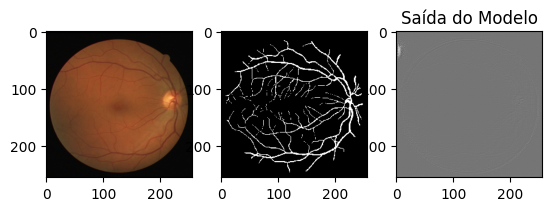

In [25]:
# Visualizar imagem, rótulo e saída para o primeiro exemplo no lote
f, axarr = plt.subplots(1, 3)

# Imagem original
img = val_images[0].detach().cpu().permute(1, 2, 0)
axarr[0].imshow(img)

# Rótulo (Ground Truth)
label = val_labels[0].detach().cpu()
axarr[1].imshow(label, cmap='gray')

# Saída do Modelo (Previsão)
output = torch.sigmoid(val_outputs[0]).detach().cpu() 
axarr[2].imshow(output, cmap='gray')
axarr[2].set_title('Saída do Modelo')

plt.show()

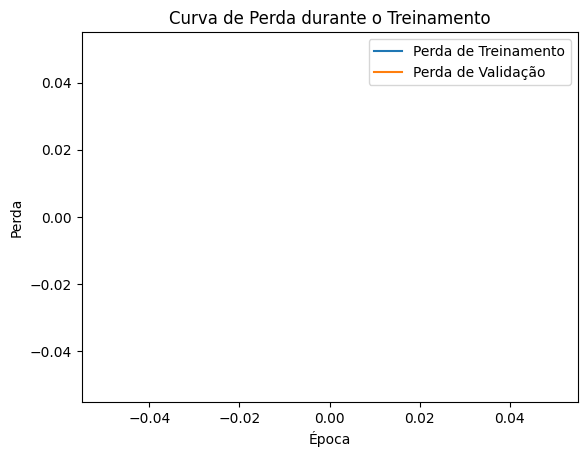

In [53]:
# Crie o gráfico
plt.plot(train_losses, label='Perda de Treinamento')
plt.plot(val_losses, label='Perda de Validação')

# Adicione rótulos e título
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Curva de Perda durante o Treinamento')

# Adicione a legenda
plt.legend()

# Exiba o gráfico
plt.show()